<h1 style="background-color:yellow; "> Table of Contents</h1> <a class="anchor" id="table-of-content"></a>
    
* [1. Problem Background & Motivation](#problem-background)
* [2. Library Importation](#import-package)
* [3. Custom Libraries](#custom-libraries)
* [4. Connect to Data Source and Data Extraction](#data-extraction)
* [5. Exploratory Data Analysis](#data-prep)
* [6. Machine Learning Model](#ml-model)
* [7. Deployment](#Deployment)
* [8. Conclusion](#Conclusion)


<h1 style="background-color:powderblue; ">1. Problem Background and Motivation</h1> <a class="anchor" id="problem-background"></a>

<h3> Resource Allocation in a Company </h3>

<h2> 1.1 General Info </h2>
Human resource allocation is considered a relevant problem in business process management (BPM). The successful allocation of available resources for the execution of process activities can impact on process performance, reduce costs and obtain a better productivity of the resources.  

<img src="https://assets-global.website-files.com/5d9ffc249511353e753840c9/61dd3a668b3508cac6f810bb_1638432074498.jpeg" alt="Resource Allocation dimensions" />

>* Based on the above Picture, we observe that there is a lot of dimensonality invloved in allocation of resources in a company.
 
 
 
<h2> 1.2 What is the problem? </h2>
 
 There is a lot of technicalities involved in assigning an employee to a project/task. It is a tideous process to carefully assign the right employee to a desired task. There are many factors involved such as experience level, training levels, seniority etc in order for this allocation. 
 
The problem arises when the company has to decide which of its employee has to be allocated to which task. This labor intensive task was previously done and kept as records in Excel or some third party software. But with the inventio of ML, now the HR department can leverage this technology and predict if an employee will complete his/her task or not and accurately allocate the resources. 

<h2> 1.3 Interested Party and Reason </h2>

The HR department in a Multi National Company would be really interested in the explained ML model as it saves them time and cost for the company. It also cuts down manual labor which is invloved when collecting the data.


 Advantages of having a ML model with Task completion prediction powers:
  >- The HR department will have a pretty good idea who will complete their tasks or not.
  >- Based on the task completion or not, the HR dept can allocate resources to tasks.
  >- The model maybe used to evaluate an employee's performance like In how much time the employee completed his work? - This can be used to give promotions or additional payouts.
  >- Based on the results, the HR dept can train the employee's in certain level to achieve maximum efficiency ( More number of employees completing with a certain training level, then the rest of the employee's can be trained in the same level)

* [Go to Top](#table-of-content) 

<h1 style="background-color:powderblue; ">2. Library Importation</h1> <a class="anchor" id="import-package"></a>
  
  Import the required packages needed for the model.
  

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:.2f}'.format
import numpy as np
import pickle

# Graphics
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go

# ML
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
from sklearn import metrics

<h1 style ="background-color:powderblue;"> 3. Custom Built Libraries</h1> <a class="anchor" id="custom-libraries"> </a>

In [2]:
# Custom function below is used to display performance measures
# Required inputs are the model name and the two test data objects (X,y)
def class_perf_measures(model,X_test,y_test):
    # Create empty lists to store metric values created within loop
    TP = []
    TN = []
    FP = []
    FN = []
    recall = []
    precision = []
    F1 = []
    Accuracy = []
    
    # Create list of probability threshold values to loop over
    threshold = np.arange(0,1.1,0.1).tolist()

    # Start loop
    for i in threshold:

        # Create class assignments given threshold value
        y_test_pred_class = (model.predict_proba(X_test)[:,1] >= i).astype(int)

        # Append lists with metric values
        TP.append(metrics.confusion_matrix(y_test, y_test_pred_class)[1,1])
        TN.append(metrics.confusion_matrix(y_test, y_test_pred_class)[0,0])
        FP.append(metrics.confusion_matrix(y_test, y_test_pred_class)[0,1])
        FN.append(metrics.confusion_matrix(y_test, y_test_pred_class)[1,0])
        recall.append(metrics.recall_score(y_test, y_test_pred_class).round(3))
        precision.append(metrics.precision_score(y_test, y_test_pred_class).round(3))
        F1.append(metrics.f1_score(y_test, y_test_pred_class).round(2))
        Accuracy.append(metrics.accuracy_score(y_test, y_test_pred_class).round(2))

    # Create dataframe
    result = pd.DataFrame({"threshold":threshold,
                           "TP":TP,
                           "TN":TN,
                           "FP":FP,
                           "FN":FN,
                           "Precision":precision,
                           "Recall":recall,
                           "Accuracy": Accuracy,
                           "F1-Score":F1
                          })

    # Let's look at our dataframe
    return result

<h1 style="background-color:powderblue; ">4. Data Extraction and Initial Evaluation</h1> <a class="anchor" id="data-extraction"></a>


Read the input data and make sense of it.

In [3]:
# Read in data - To see what the data can tell us
url = 'https://github.com/Bhyrav17/Task_Completion_Classification/blob/main/Data/SystemAdministrators.csv?raw=true'
df = pd.read_csv(url, index_col=0)

# get the last 10 records to get a count of the records and see the column data
df.tail(10) 

,task_completed,employee_experience,training_level4,training_level6,training_level8
65,0,6.50,1,0,0
66,0,7.40,0,0,1
67,0,6.50,1,0,0
68,0,8.20,1,0,0
69,0,5.90,1,0,0
70,0,5.60,1,0,0
71,0,5.90,0,0,1
72,0,6.40,0,1,0
73,0,3.80,1,0,0
74,0,5.30,1,0,0


In [4]:
# check number of rows with non null values and data type of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   task_completed       75 non-null     int64  
 1   employee_experience  75 non-null     float64
 2   training_level4      75 non-null     int64  
 3   training_level6      75 non-null     int64  
 4   training_level8      75 non-null     int64  
dtypes: float64(1), int64(4)
memory usage: 3.1 KB


> **Initial Evaluation - Notes on Findings**<br><br>
>**Observations:**<br>
>>**75 Records**<br><br>
>>**Outcome:** The target variable is **task_completed**<br>

The below observations is just assumptions made with the given data with logical aspects.

>- Its a Classification problem where the predictors are employee_ experience and different training levels
>- task_completed ( 1 if the person has finished a given task, 0 otherwise)
>- employee_experience ( Mentions the no.of.years the employee has experience with the job) - Years is the most likely term, but this can be in months also
>- training_level4,training_level6 and training_level8 - Determines the seniority level of the employee. ( my assumption is the higher the level of training, that employee will finish the task at hand - Let's explore this )



>[Go to Data Extraction](#data-extraction)

<h1 style="background-color:powderblue; ">5. Exploratory Data Analysis</h1> <a class="anchor" id="data-prep"></a>

* [Go to Top of Notebook](#table-of-content)

- [X] [Initial Evaluation](#data-extraction)
- [X] [Initial Cleanup - Duplicates and missing values](#missing-values)
- [X] [Outlier Detection & Treatment](#outliers-treatment)
- [X] [Feature Selection](#feature-selection)
- [X] [Feature Transformations](#feature-transformations)
- [X] [Data Partitioning](#data-split)
- [X] [Data Normalization](#data-norm)


> <h3 style="color:MediumSeaGreen;"> Initial Cleanup - dupes, missing values </h3> <a class="anchor" id="missing-values"></a>

In [5]:
df.columns = df.columns.str.replace(' ', '_') # replacing the spaces in the columns with underscore 

In [6]:
df.isnull().sum()  #isnull() counts all the nulls in the columns and sum() adds them up for every column

task_completed         0
employee_experience    0
training_level4        0
training_level6        0
training_level8        0
dtype: int64

<AxesSubplot:xlabel='task_completed', ylabel='Count'>

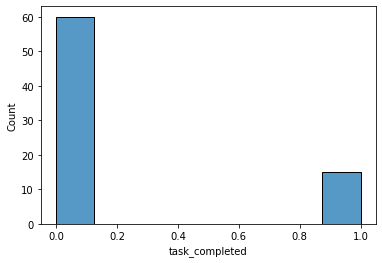

In [7]:
sns.histplot(data=df,x='task_completed')

> **Initial Cleanup:** <br>
> *Summary*<br>
>>- There was no nulls or dupes present in the data.


>[Go to Data Prep Index](#data-prep)

> <h3 style="color:MediumSeaGreen;"> Outlier Detection & Treatment </h3> <a class="anchor" id="outliers-treatment"></a>

In [8]:
DataTypes = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

df_temp = df.select_dtypes(include=DataTypes)


df_temp.describe().T

,count,mean,std,min,25%,50%,75%,max
task_completed,75.00,0.20,0.40,0.00,0.00,0.00,0.00,1.00
employee_experience,75.00,6.80,2.27,2.70,5.20,6.30,7.85,13.70
training_level4,75.00,0.76,0.43,0.00,1.00,1.00,1.00,1.00
training_level6,75.00,0.17,0.38,0.00,0.00,0.00,0.00,1.00
training_level8,75.00,0.07,0.25,0.00,0.00,0.00,0.00,1.00


<AxesSubplot:xlabel='task_completed', ylabel='Count'>

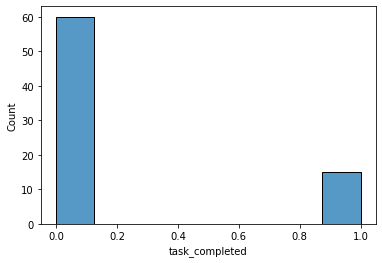

In [9]:
sns.histplot(data=df,x='task_completed')

> **Outlier Detection: Summary of Actions**<br>
<br>
>**Note:**<br>
    >- There was no outliers found in this data
    >- Clearly there is a class imbalance problem as there is more number of 0's than 1's.  Possible solution would be to do undersampling or oversampling - Will try it out.

>[Go to Data Prep Index](#data-prep)

> <h3 style="color:MediumSeaGreen;"> Feature Selection</h3> <a class="anchor" id="feature-selection"></a>

In [10]:
df.select_dtypes(include=DataTypes).corr().round(3)

,task_completed,employee_experience,training_level4,training_level6,training_level8
task_completed,1.00,0.70,-0.19,0.12,0.13
employee_experience,0.70,1.00,-0.25,0.20,0.12
training_level4,-0.19,-0.25,1.00,-0.81,-0.48
training_level6,0.12,0.20,-0.81,1.00,-0.12
training_level8,0.13,0.12,-0.48,-0.12,1.00


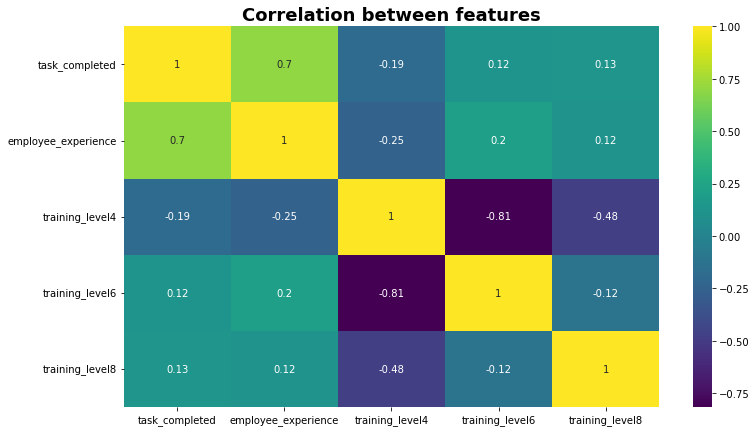

In [11]:
#Plotting heat map to visualize the correlations - More user friendly than to check with the numbers and signs.  
#I'm choosing to share this map as it makes life easier by letting us find the strong/weak correlations faster
df_corr=df.corr().round(3)
f,ax=plt.subplots(figsize=(12,7))
sns.heatmap(df_corr,cmap='viridis',annot=True)
plt.title("Correlation between features",weight='bold',fontsize=18)
plt.show()

>**Note:**<br>
>Features with Strong/Weak Correlations :
>1. employee_experience(+)
>2. training_level4 (-)
>3. training_level4 (+)
>4. training_level4 (+)
<br>
<br>

>**Decision:**<br>
>1. As there is less number of predictors available in the data and also looking at the cross correlation. I'm deciding to go with all the predictors available 
<br><br>
>**NOTE:** <br>
   We have to keep in mind that, for classification problems - we do regularization to pick the features. Can check once again coming back


>[Go to Data Prep Index](#data-prep)

> **Feature Selection:** <br>
> *Summary*<br>
>>- Keeping all the predictor variables as there are in less number<br>


>[Go to Data Prep Index](#data-prep)

> <h3 style="color:MediumSeaGreen;"> Feature Transformation</h3> <a class="anchor" id="feature-transformations"></a>

> **Feature Transformation:** <br>
> *Summary*<br>
>>- All the variables are in the desired formats, hence no need of feature transformation<br>



>[Go to Data Prep Index](#data-prep)

> <h3 style="color:MediumSeaGreen;"> Data Partition - TTS </h3> <a class="anchor" id="data-split"></a>

>- 1. Encompassing all the predictor variables into a variable X  <br>
>- 2. Encompassing the target variable to variable Y<br>
>- 3. Split the Training and Test Data by 70/30 with random state- 0<br>

In [12]:
target = ['task_completed']

X = df.drop(target,axis=1)
y = df[target]

# Split data
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.3,random_state=1)

In [13]:
#To check how the data has been split
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(52, 4)
(52, 1)
(23, 4)
(23, 1)


>[Go to Data Prep Index](#data-prep)

> <h3 style="color:MediumSeaGreen;"> Data Normalization </h3> <a class="anchor" id="data-norm"></a>

In [14]:
# Normalizing the predictor variables using Z-Scores method.
# Use means and standard deviations of features as calculated in the TRAINING DATA
# New values are centered at 0.  Values reflect the number of standard deviations
# each record is above or below the mean.

features_means = X_train.mean()
features_std = X_train.std()

X_train = (X_train - features_means)/features_std
X_test = (X_test - features_means)/features_std

>**NOTE:**:
 Always do Data Normalization for KNN as it is sensitive to the scaling of the data. It's always a good idea to do it when this model is involved.

>[Go to Data Prep Index](#data-prep)

<h1 style="background-color:powderblue; ">6. Machine Learning </h1> <a class="anchor" id="ml-model"></a>

- [X] [kNN classifier](#first-model)
- [X] [Logistic Regression](#second-model)
- [ ] [Performance Evaluation](#perf-eval)


* [Go to Top](#table-of-content)

> **Model 1** <a class="anchor" id="first-model"></a>
<br>
>Info:<br>

>KNN classifer:
>- Finds the nearest neighour and assigns the new record to the variable with the most votes  
>- Pick an odd number for KNN as there would be no ambiguity during voting 
>- Evaluate using accuracy

In [15]:
# 1. Looping through different values of K to find optimal value of K
results = []
for k in [1,3,5,7,9,11,13,15,17,19,21,23,25,27,29]:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train.values.ravel())
    
    # Get predicted class
    y_pred_class = knn.predict(X_test)
    
    # Put Accuracy Score in results object
    results.append({'k':k,
                    'accuracy':metrics.accuracy_score(y_test,y_pred_class)
                   }
                  )
# Put results from above into a Pandas Dataframe
results_df = pd.DataFrame(results)
results_df

,k,accuracy
0,1,0.87
1,3,0.91
2,5,0.87
3,7,0.87
4,9,0.87
5,11,0.83
6,13,0.83
7,15,0.87
8,17,0.91
9,19,0.91


>**Decision:**<br>
Based on the results above, I will set my number of neighbors (k) to 3 (also decided based on the data set size) as this achieves the highest accuracy value, even though for some values of K we are getting the same value<br>

>**Re-run kNN using the value selected above:**<br>
For this final run of kNN, we will produce a table of performance measures across a range of probability threshold values

In [16]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train.values.ravel())

# Let's do a quick check to see if we have to worry about problems of overfitting.
# Remember!  Small values for "k" in kNN tend to lead to overfitting.
# Large value for "k" in kNN tend to produce underfit models
y_train_pred_class = knn.predict(X_train)
y_test_pred_class = knn.predict(X_test)

print('Training data Accuracy:', metrics.accuracy_score(y_train,y_train_pred_class).round(2))
print('Testing data Accuracy:', metrics.accuracy_score(y_test,y_test_pred_class).round(2))


Training data Accuracy: 0.92
Testing data Accuracy: 0.91


**NOTE** :
Based on the testing and training accuracy, there might be some overfitting problems which might need to be investigated further. --> UPDATE: Changed the random state to different values and the training and testing values improved.

#### Elbow Graph method

In [17]:
#Trying the elbow graph to find the best value of K - This takes into account the error rate to decide on the value of K

error_rate = []

# Will take some time
for i in range(1,40):    
    knn1 = KNeighborsClassifier(n_neighbors=i)
    knn1.fit(X_train,y_train.values.ravel())
    pred_i = knn1.predict(X_test)
    pred_i = pred_i.reshape(X_test.shape[0],1)
    error_rate.append(np.mean(pred_i != y_test,axis=0))

Text(0, 0.5, 'Error Rate')

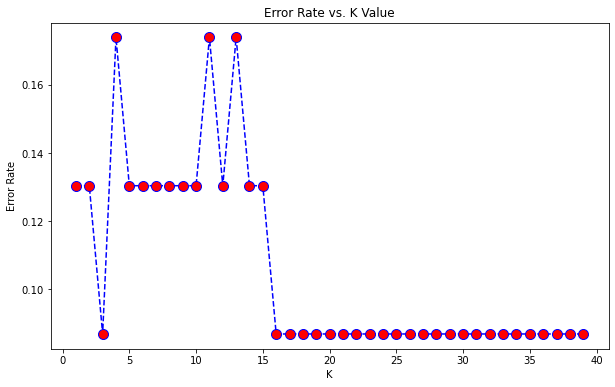

In [18]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
 markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

> **MODEL1(KNN) - Summary and Questions** <br>
> *Summary*<br>
>>- The Accuracy score is the same for all the K values, hence we select a value of K which does not overfit/underfit the data too much i.e. k=3<br>
>>- Tried the elbow graph - It can be inferred from the graph that there is less error when k=3 and it increases again after k=3. Hence,it justifies the reason why we have taken k=3<br>


> **Model 2** <a class="anchor" id="second-model"></a>
<br>
>Logistic Regression( Logistic Model):

>- Running the same data with logit model to compare the performance
>- Defining multiple thresholds to check which is better


In [19]:
lr_model = LogisticRegression()
lr_model.fit(X_train,y_train.values.ravel())

#predicting the values with the trained model
y_train_pred_class = lr_model.predict(X_train)
y_test_pred_class = lr_model.predict(X_test)

print('Training data Accuracy:', metrics.accuracy_score(y_train,y_train_pred_class).round(2))
print('Testing data Accuracy:', metrics.accuracy_score(y_test,y_test_pred_class).round(2))

Training data Accuracy: 0.92
Testing data Accuracy: 0.87


>**Winning Model:**<br>
We need to quickly decide which modeling framework to go forward with<br>
To keep this simple - I'm going to use AUC and will choose the model that gives us the highest value

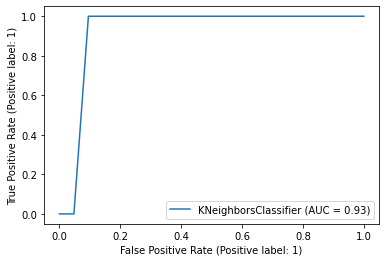

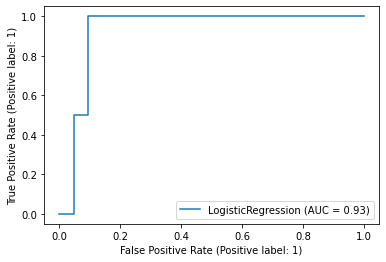

In [20]:
# ROC curve for kNN
metrics.RocCurveDisplay.from_estimator(knn,X_test,y_test)
plt.show()

# ROC curve for Logistic Model
metrics.RocCurveDisplay.from_estimator(lr_model,X_test,y_test)
plt.show()

>**Decision Point:**<br>
AUC is the same for both the models, I interchangebly tried both the models to check for performance. I'm picking Logistic Model to further evaluate other performance scores like F1 score etc.

> **Performance metrics** <a class="anchor" id="perf-eval"></a>

In [21]:
class_perf_measures(lr_model,X_test,y_test)

C:\Users\psupr\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,threshold,TP,TN,FP,FN,Precision,Recall,Accuracy,F1-Score
0,0.00,2,0,21,0,0.09,1.00,0.09,0.16
1,0.10,2,17,4,0,0.33,1.00,0.83,0.50
2,0.20,2,18,3,0,0.40,1.00,0.87,0.57
3,0.30,2,18,3,0,0.40,1.00,0.87,0.57
4,0.40,2,19,2,0,0.50,1.00,0.91,0.67
5,0.50,1,19,2,1,0.33,0.50,0.87,0.40
6,0.60,1,20,1,1,0.50,0.50,0.91,0.50
7,0.70,1,20,1,1,0.50,0.50,0.91,0.50
8,0.80,1,20,1,1,0.50,0.50,0.91,0.50
9,0.90,0,20,1,2,0.00,0.00,0.87,0.00


1. **Prob Threshold = 0.1**:
    - The probability threshold is set to 10%, which means if the predicted probabilities is greater than or equal to 0.1, then it is termed as TasKCompleted(1) else not completed(0)
    - Low threshold value leads our model in predicting more no. of. employees have finished their task.
        We can see this in our test set has been assigned to task completed -2 ( a relatively low number because the data set is not large).
    - False positive (FP) - this is in line with the probability taken for observation and is relatively high (4). If the business(HR) gives importance to this measure,the model will wrongly classify the employee who has not completed the task to be termed as completed. This will lead the HR team to allocate this employee to another task and would cause imbalance in the whole system of allocation which would cost the company a significant amount of money. 
    - False Negative (FN) - The number is --> reflects in recall score to be 1. If the business(HR) gives importance to this measure,the model will  classify the employee who has completed the task to be termed as not completed. This will lead to ambiguity in assigning the task and repetition of the same work
    - We also see that accuracy is quite high for this threshold, but the precision score is not.

       
<br><br>

2. **Prob Threshold = 0.4**:
    - The probability threshold is set to 40%, which means if the predicted probabilities is greater than or equal to 0.4, then       it is termed as TasKCompleted(1) else not completed(0)
    - False Positive - 2
    - False Negative - 0
    - is this a better threshold than 0.1?   - Yes, As i'm considering the FP to be the most costliest mistake, reducing the same will lead to better results for the company. Checking the precision score : 50% , which is to be considered for these type of mistakes which penalize the model.
    - Accuracy is relatively high while precision and recall scores are also in the same range. F1 score being highest for this model.  
<br><br>


3. **Prob Threshold = 0.8**:
    - The probability threshold is set to 80%, which means if the predicted probabilities is greater than or equal to 0.8, then it is termed as TasKCompleted(1) else not completed(0)
    - False Positive - 1
    - False Negative - 1
    - is this a better threshold than 0.1 and 0.4?- NO, Even though i'm considering FP, the F1 score falls to 0.50 and we have better results in the probability threshold of 0.4.
<br><br>


4. **Which threshold would you choose?  Justify your decision.**

    > According to my business understanding, making a FALSE POSITIVE is more costly to the company than false negative as the work will be deemed as completed and moved on, but later when it is realized that its not completed. The cost to the company would be more and also extra cost for completing the unfinished work
    
    Hence, I would consider the probability threshold of 40% and penalize the model with FALSE Positive i.e.Precision score to be important rather than recall or accuracy.

<h1 style="background-color:powderblue; ">7. Deployment </h1> <a class="anchor" id="Deployment"></a>

* [Go to Top](#table-of-content)

In [22]:
pickle_out = open('classifier', mode='wb')
pickle.dump(lr_model, pickle_out)
pickle_out.close()

In [23]:
%%writefile app.py

import pickle
import streamlit as st

pickle_in = open('classifier', 'rb')   #Unpickling
classifier = pickle.load(pickle_in)

st.set_page_config(page_title='Resource Allocation ', page_icon="🗓️")    #The set_page_config method lets us define the webpage title name and icon

@st.cache()


# Define the function which will make the prediction using data
# inputs from users
def prediction(employee_experience, training_level4,
               training_level6, training_level8):
    
    # Make predictions
    prediction = classifier.predict(
        [[employee_experience, training_level4,training_level6, training_level8]])
    
    if prediction == 0:
        pred = 'The Employee has completed the TASK'
    else:
        pred = 'Employee has not completed the task - Please look into it'
    return pred

# This is the main function in which we define our webpage
def main():
    
    st.title("Allocation Strategy Model")   # Title of the model displayed in the webpage
    
    #Give a little bit information of the Model
    st.info('The Model takes in the below predictor variables for a company and predicts if an employee is going to complete his/her task successfully!', icon="ℹ️")
    
    # Create input fields
    employee_experience = st.number_input("How many years of work experience does the eemployee have? (In years)",
                                  min_value=2.0,
                                  max_value=14.0,
                                  value=2.5,
                                  step=0.2,
                                 )
    training_level4 = st.number_input("Is the employee trained on level 4? ('1' for Yes and '0' for NO) ",
                              min_value=0,
                              max_value=1,
                              value=0,
                              step=1
                             )

    training_level6 = st.number_input("Is the employee trained on level 6?('1' for Yes and '0' for NO)",
                              min_value=0,
                              max_value=1,
                              value=0,
                              step=1
                             )
    training_level8 = st.number_input("Is the employee trained on level 8?('1' for Yes and '0' for NO)",
                          min_value=0,
                          max_value=1,
                          value=0,
                          step=1
                             )

    result = ""
    
    # When 'Predict' is clicked, make the prediction and store it
    if st.button("Predict"):
        result = prediction(employee_experience, training_level4,training_level6, training_level8)
        st.success(result)
        #If the predictions are true, celebrate that the model is properly working, else spit out a  warning
        if(result == 'The Employee has completed the TASK'):
            st.balloons()   
        else:
            st.image('https://static.vecteezy.com/system/resources/previews/005/468/835/non_2x/frustrated-stickman-boss-holding-finished-hourglass-and-shouting-at-employee-stickman-employee-is-very-upset-deadline-is-over-and-the-task-could-not-be-completed-free-vector.jpg',caption="Work/Task Not completed",width=500)
     
    st.image("https://upload.wikimedia.org/wikipedia/commons/f/f3/W._P._Carey_School_of_Business_logo.png", width = 150)
    st.write("Built by Supreeth P")
    st.write("Version 1.0.0")
    
if __name__=='__main__':
    main()

Overwriting app.py


**NOTE:**
> I tried to change the default probability threshold sent to the pickle file or streamlit ( the ouput deployment) by using pred_proba instead of predict call. Ran into some issues while encoding this with the predictor variables. Still working on this and will get in touch If i'm unable to find the solution.

In [24]:
!streamlit run app.py

^C


<h1 style="background-color:powderblue; ">6. Conclusion </h1> <a class="anchor" id="Conclusion"></a>

* [Go to Top](#table-of-content)

> Coming from a data scientist point of view, I would ask the HR dept for more data, as the data provided is not enough to give very accurate and precise models. As we do not have that info, we are going ahead with what we have and concluding our results on the same.

> Based the developed models, I would consider the Logistic Model which has better AUC than KNN

> I would consider the probability threshold of 40% and penalize the model with FALSE Positive i.e.Precision score to be important rather than recall or accuracy. 

> Due to the imbalance in the dataset, our streamlit app will be more leaning towards to one result ( More number of 0's ). This is evident when the app is run and prediction is seen.
